In [28]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pickle
import re
import glob
from sklearn.metrics import f1_score,precision_score,recall_score

%matplotlib inline

In [4]:
runname = 'FS269_BEST'
testname = ''
test_value = 0

In [48]:
runname = 'FS280'
testname = 'WEIGHTED_SEG_LOSS_P'
test_value = '0'

In [58]:
runname =  'WS143'
testname = 'DELTA_CLS_LOSS'
test_value = "0.1"

In [24]:
runname =  'FS280_BEST'
testname = ''
test_vals_list = []
paths = glob.glob(f'/{runname}/{testname}/*')
for file in paths:
    inter = os.path.normpath(file)
    test_vals_list.append(inter.split(os.sep)[-1])


In [29]:
runname =  'FS280'
testname = 'NORMAL'
test_vals_list = []
paths = glob.glob(f'E:/AI/FAPS/code/Mixedsupervision/results/PA/WS143/{testname}/*')
for file in paths:
    inter = os.path.normpath(file)
    test_vals_list.append(inter.split(os.sep)[-1])

test_vals_list = ['c']

In [30]:
runname = 'FS280_BEST'
testname = ''

In [31]:
with open(f'./labels/l_to_i.pyb', "rb") as fp:   #Pickling
    label_image_pair = pickle.load(fp)
with open(f'./labels/i_l.pyb', "rb") as fp:   #Pickling
    image_label_pair = pickle.load(fp)

In [32]:
result_parent_path = '/home/woody/iwfa/iwfa024h/results/PA_M/'

plot_threshold_mean 

 [[0.1        0.11593038 0.66898274]
 [0.2        0.13848855 0.13716058]
 [0.3        0.15197338 0.15146076]
 [0.4        0.16910269 0.16539707]
 [0.5        0.18722199 0.18165556]] 

 plot_threshold_mean_pos 

 [[0.1        0.1173105  0.11728731]
 [0.2        0.13848855 0.13716058]
 [0.3        0.15197338 0.15146076]
 [0.4        0.16910269 0.16539707]
 [0.5        0.18722199 0.18165556]] 

 plot_wrong_count 

 [[ 0.1 83.  85.  35.  36. ]
 [ 0.2 76.  83.  34.  35. ]
 [ 0.3 75.  83.  34.  35. ]
 [ 0.4 71.  80.  32.  35. ]
 [ 0.5 68.  77.  29.  35. ]]


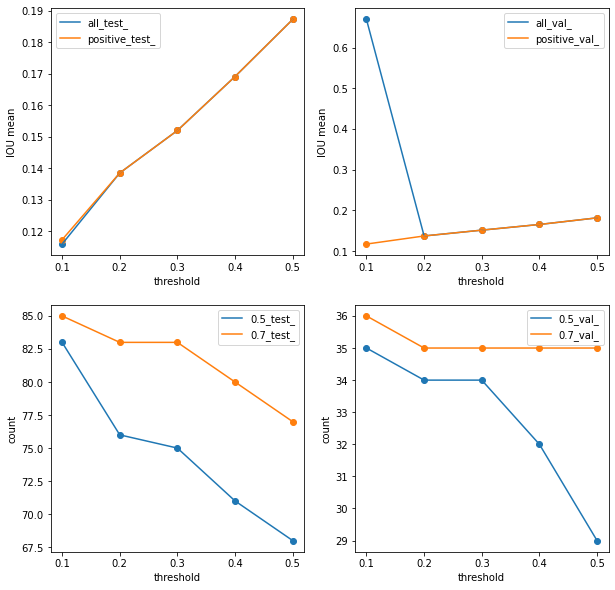

In [33]:
fig,(ax1,ax2) = plt.subplots(2,2,figsize=(10,10))

thresholds = [0.1,0.2,0.3,0.4,0.5]
test_value = ''

plot_threshold_mean = []
plot_threshold_mean_pos = []
plot_wrong_count = [] 
plot_label_count = []

i=0
for thresh in thresholds:

    test_resultcsv_path = os.path.join(result_parent_path,runname,f'TEST_results{thresh*10}.csv').replace("\\",'/')
    val_resultcsv_path = os.path.join(result_parent_path,runname,f'VAL_results{thresh*10}.csv').replace("\\",'/')


    test_df_result = pd.read_csv(test_resultcsv_path)
    val_df_result = pd.read_csv(val_resultcsv_path)

    test_wrong_df = test_df_result[(test_df_result['IOU'] < 0.5)].sort_values('IOU')
    val_wrong_df = val_df_result[(val_df_result['IOU'] < 0.5)].sort_values('IOU')

#     print(wrong_df)
#     print("thresh:",i,f'wrong count:{wrong_df.shape[0]} %{wrong_df.shape[0]/df_result.shape[0]*100//1}')
    plot_wrong_count.append([thresh,test_wrong_df.shape[0],test_df_result.IOU[(test_df_result['IOU'] < 0.7)].shape[0],
                            val_wrong_df.shape[0],val_df_result.IOU[(val_df_result['IOU'] < 0.7)].shape[0]])

    plot_threshold_mean.append([thresh,test_df_result.IOU.mean(),val_df_result.IOU.mean()])
    plot_threshold_mean_pos.append([thresh,test_df_result.IOU[test_df_result.ground_truth != "0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"].mean(),val_df_result.IOU[val_df_result.ground_truth != "0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"].mean()])
#     print('iou',df_result.IOU.mean(),'iou_positive:',df_result.IOU[df_result.ground_truth == True].mean())

    test_imgs = []
    for i in test_wrong_df.index:
        img = test_wrong_df.loc[i].img_name
        test_imgs.append(img)

    val_imgs = []
    for i in val_wrong_df.index:
        img = val_wrong_df.loc[i].img_name
        val_imgs.append(img)

    count_dict = dict.fromkeys(list(label_image_pair.keys()),[0,0])

#     img_dict = {}
    false_ls = []
    for i in test_imgs:
        if i not in image_label_pair.keys():
            continue
        for l in image_label_pair[i]:
            false_ls.append(int(l))
            if l in count_dict.keys():
                count_dict[l][0]+=1
#                 img_dict[l].append(i)
            else:
                count_dict[l][0] = 1

    false_ls = []
    for i in val_imgs:
        if i not in image_label_pair.keys():
            continue
        for l in image_label_pair[i]:
            false_ls.append(int(l))
            if l in count_dict.keys():
                count_dict[l][1]+=1
#                 img_dict[l].append(i)
            else:
                count_dict[l][1] = 1
#                 img_dict[l] = [i]

#     print('False classification: ',count_dict)
    plot_label_count.append([thresh,count_dict.copy()])
#     for l in np.sort(np.int32(list(count_dict.keys()))):
#         print(l,count_dict[str(l)]/5)
# df_result.loc[:,'ground_truth'] =  df_result.loc[:,'ground_truth'] == 1
plot_threshold_mean = np.array(plot_threshold_mean)
plot_threshold_mean_pos = np.array(plot_threshold_mean_pos)
plot_wrong_count = np.array(plot_wrong_count)

print('plot_threshold_mean','\n\n',plot_threshold_mean, '\n\n','plot_threshold_mean_pos','\n\n',plot_threshold_mean_pos,'\n\n','plot_wrong_count','\n\n',plot_wrong_count)

#     plt.subplot(1,1)
ax1[0].plot(plot_threshold_mean[:,0], plot_threshold_mean[:,1],label='all_test_'+test_value)
ax1[0].plot(plot_threshold_mean_pos[:,0], plot_threshold_mean_pos[:,1],label='positive_test_'+test_value)
ax1[0].scatter(plot_threshold_mean[:,0], plot_threshold_mean[:,1])
ax1[0].scatter(plot_threshold_mean_pos[:,0], plot_threshold_mean_pos[:,1])

ax1[1].plot(plot_threshold_mean[:,0], plot_threshold_mean[:,2],label='all_val_'+test_value)
ax1[1].plot(plot_threshold_mean_pos[:,0], plot_threshold_mean_pos[:,2],label='positive_val_'+test_value)
ax1[1].scatter(plot_threshold_mean[:,0], plot_threshold_mean[:,2])
ax1[1].scatter(plot_threshold_mean_pos[:,0], plot_threshold_mean_pos[:,2])

for c in [0,1]:   
    ax1[c].legend()
    ax1[c].set_xlabel('threshold')
    ax1[c].set_ylabel('IOU mean')
#     ax1[c].set_ylim(0,1)
#     ax1.legend(loc=4)

#     plt.subplot(2,1)
ax2[0].plot(plot_wrong_count[:,0], plot_wrong_count[:,1],label='0.5_test_'+test_value)
ax2[0].scatter(plot_wrong_count[:,0], plot_wrong_count[:,1])
ax2[0].plot(plot_wrong_count[:,0], plot_wrong_count[:,2],label='0.7_test_'+test_value)
ax2[0].scatter(plot_wrong_count[:,0], plot_wrong_count[:,2])

ax2[1].plot(plot_wrong_count[:,0], plot_wrong_count[:,3],label='0.5_val_'+test_value)
ax2[1].scatter(plot_wrong_count[:,0], plot_wrong_count[:,3])
ax2[1].plot(plot_wrong_count[:,0], plot_wrong_count[:,4],label='0.7_val_'+test_value)
ax2[1].scatter(plot_wrong_count[:,0], plot_wrong_count[:,4])

for c in [0,1]:   
    ax2[c].legend()
    ax2[c].set_xlabel('threshold')
    ax2[c].set_ylabel('count')
#     ax2[c].set_ylim(0,204)
plt.savefig('result.jpg')

plot_threshold_mean 

 [[0.1        0.99466293 0.98636821]
 [0.2        0.99467168 0.98626777]
 [0.3        0.99410112 0.98415079]
 [0.4        0.99213743 0.98222178]
 [0.5        0.99196112 0.98093857]] 

 plot_threshold_mean_pos 

 [[0.1        0.98703855 0.96364855]
 [0.2        0.9870598  0.96338073]
 [0.3        0.98567414 0.95773544]
 [0.4        0.9809052  0.95259141]
 [0.5        0.980477   0.94916951]] 

 plot_wrong_count 

 [[0.1 0.  0.  0.  1. ]
 [0.2 0.  0.  0.  1. ]
 [0.3 0.  0.  0.  1. ]
 [0.4 0.  0.  0.  1. ]
 [0.5 0.  0.  0.  1. ]]


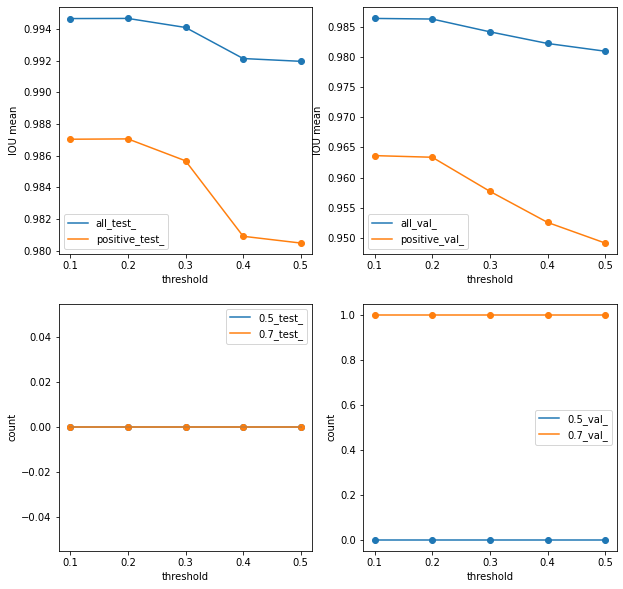

In [34]:
fig,(ax1,ax2) = plt.subplots(2,2,figsize=(10,10))



thresholds = [0.1,0.2,0.3,0.4,0.5]
test_value = ''

plot_threshold_mean = []
plot_threshold_mean_pos = []
plot_wrong_count = [] 
plot_label_count = []

i=0
for thresh in thresholds:
    

    test_resultcsv_path = os.path.join(result_parent_path,runname,f'TEST_results{thresh*10}.csv').replace("\\",'/')
    val_resultcsv_path = os.path.join(result_parent_path,runname,f'VAL_results{thresh*10}.csv').replace("\\",'/')


    test_df_result = pd.read_csv(test_resultcsv_path)
    val_df_result = pd.read_csv(val_resultcsv_path)
    
    test_df_result.columns = ['prediction','fscore', 'ground_truth', 'IOU', 'img_name']
    val_df_result.columns = ['prediction','fscore', 'ground_truth', 'IOU', 'img_name']

    test_wrong_df = test_df_result[(test_df_result['IOU'] < 0.5)].sort_values('IOU')
    val_wrong_df = val_df_result[(val_df_result['IOU'] < 0.5)].sort_values('IOU')

#     print(wrong_df)
#     print("thresh:",i,f'wrong count:{wrong_df.shape[0]} %{wrong_df.shape[0]/df_result.shape[0]*100//1}')
    plot_wrong_count.append([thresh,test_wrong_df.shape[0],test_df_result.IOU[(test_df_result['IOU'] < 0.7)].shape[0],
                            val_wrong_df.shape[0],val_df_result.IOU[(val_df_result['IOU'] < 0.7)].shape[0]])

    plot_threshold_mean.append([thresh,test_df_result.IOU.mean(),val_df_result.IOU.mean()])
    plot_threshold_mean_pos.append([thresh,test_df_result.IOU[test_df_result.ground_truth != "0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"].mean(),val_df_result.IOU[val_df_result.ground_truth != "0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"].mean()])
#     print('iou',df_result.IOU.mean(),'iou_positive:',df_result.IOU[df_result.ground_truth == True].mean())

    test_imgs = []
    for i in test_wrong_df.index:
        img = test_wrong_df.loc[i].img_name
        test_imgs.append(img)

    val_imgs = []
    for i in val_wrong_df.index:
        img = val_wrong_df.loc[i].img_name
        val_imgs.append(img)

    count_dict = dict.fromkeys(list(label_image_pair.keys()),[0,0])

#     img_dict = {}
    false_ls = []
    for i in test_imgs:
        if i not in image_label_pair.keys():
            continue
        for l in image_label_pair[i]:
            false_ls.append(int(l))
            if l in count_dict.keys():
                count_dict[l][0]+=1
#                 img_dict[l].append(i)
            else:
                count_dict[l][0] = 1

    false_ls = []
    for i in val_imgs:
        if i not in image_label_pair.keys():
            continue
        for l in image_label_pair[i]:
            false_ls.append(int(l))
            if l in count_dict.keys():
                count_dict[l][1]+=1
#                 img_dict[l].append(i)
            else:
                count_dict[l][1] = 1
#                 img_dict[l] = [i]

#     print('False classification: ',count_dict)
    plot_label_count.append([thresh,count_dict.copy()])
#     for l in np.sort(np.int32(list(count_dict.keys()))):
#         print(l,count_dict[str(l)]/5)
# df_result.loc[:,'ground_truth'] =  df_result.loc[:,'ground_truth'] == 1
plot_threshold_mean = np.array(plot_threshold_mean)
plot_threshold_mean_pos = np.array(plot_threshold_mean_pos)
plot_wrong_count = np.array(plot_wrong_count)

print('plot_threshold_mean','\n\n',plot_threshold_mean, '\n\n','plot_threshold_mean_pos','\n\n',plot_threshold_mean_pos,'\n\n','plot_wrong_count','\n\n',plot_wrong_count)

#     plt.subplot(1,1)
ax1[0].plot(plot_threshold_mean[:,0], plot_threshold_mean[:,1],label='all_test_'+test_value)
ax1[0].plot(plot_threshold_mean_pos[:,0], plot_threshold_mean_pos[:,1],label='positive_test_'+test_value)
ax1[0].scatter(plot_threshold_mean[:,0], plot_threshold_mean[:,1])
ax1[0].scatter(plot_threshold_mean_pos[:,0], plot_threshold_mean_pos[:,1])

ax1[1].plot(plot_threshold_mean[:,0], plot_threshold_mean[:,2],label='all_val_'+test_value)
ax1[1].plot(plot_threshold_mean_pos[:,0], plot_threshold_mean_pos[:,2],label='positive_val_'+test_value)
ax1[1].scatter(plot_threshold_mean[:,0], plot_threshold_mean[:,2])
ax1[1].scatter(plot_threshold_mean_pos[:,0], plot_threshold_mean_pos[:,2])

for c in [0,1]:   
    ax1[c].legend()
    ax1[c].set_xlabel('threshold')
    ax1[c].set_ylabel('IOU mean')
#     ax1[c].set_ylim(0,1)
#     ax1.legend(loc=4)

#     plt.subplot(2,1)
ax2[0].plot(plot_wrong_count[:,0], plot_wrong_count[:,1],label='0.5_test_'+test_value)
ax2[0].scatter(plot_wrong_count[:,0], plot_wrong_count[:,1])
ax2[0].plot(plot_wrong_count[:,0], plot_wrong_count[:,2],label='0.7_test_'+test_value)
ax2[0].scatter(plot_wrong_count[:,0], plot_wrong_count[:,2])

ax2[1].plot(plot_wrong_count[:,0], plot_wrong_count[:,3],label='0.5_val_'+test_value)
ax2[1].scatter(plot_wrong_count[:,0], plot_wrong_count[:,3])
ax2[1].plot(plot_wrong_count[:,0], plot_wrong_count[:,4],label='0.7_val_'+test_value)
ax2[1].scatter(plot_wrong_count[:,0], plot_wrong_count[:,4])

for c in [0,1]:   
    ax2[c].legend()
    ax2[c].set_xlabel('threshold')
    ax2[c].set_ylabel('count')
#     ax2[c].set_ylim(0,204)
plt.savefig('result.jpg')

In [35]:
test_df_result

,prediction,fscore,ground_truth,IOU,img_name
0,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0",NaN,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0",1.000000,4
1,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0",NaN,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0",1.000000,7
2,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0",NaN,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0",1.000000,10
3,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0",NaN,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0",1.000000,15
4,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0",NaN,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0",1.000000,20
...,...,...,...,...,...
199,"0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.04,0.06,0.0,1.0...",0.095745,"0,0,0,0,0,0,0,0,0,0,1,1",1.000000,980
200,"0.0,0.31,0.0,0.0,1.0,1.0,0.0,0.01,0.01,0.99,0....",0.331776,"0,1,0,0,1,1,0,0,0,1,0,0",0.913165,986
201,"0.0,0.0,0.4,0.95,0.0,0.0,0.0,0.0,0.03,0.14,0.0...",0.279621,"0,0,1,1,0,0,0,0,0,1,0,1",0.814815,989
202,"0.0,0.0,0.0,0.0,0.0,1.0,0.99,0.0,0.02,0.19,0.0...",0.436620,"0,0,0,0,0,1,1,0,0,1,0,1",0.814815,996


In [36]:
test_df_result.column

AttributeError: 'DataFrame' object has no attribute 'column'

FileNotFoundError: [Errno 2] File /home/woody/iwfa/iwfa024h/results/PA_M/FS280_BEST/c/TEST/results1.0.csv does not exist: '/home/woody/iwfa/iwfa024h/results/PA_M/FS280_BEST/c/TEST/results1.0.csv'

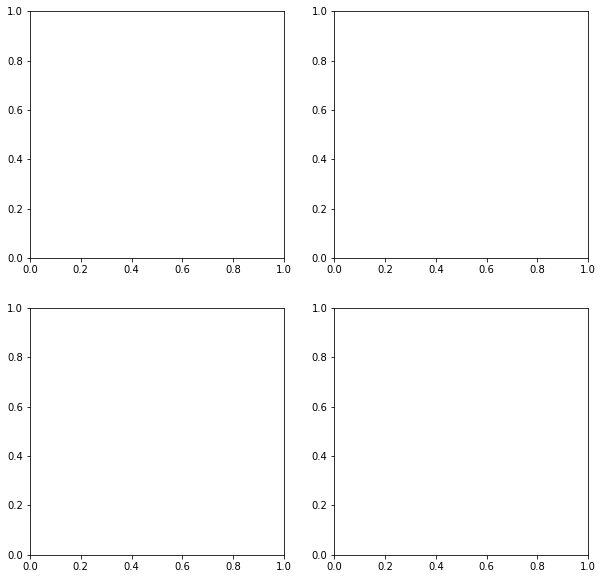

In [37]:

fig,(ax1,ax2) = plt.subplots(2,2,figsize=(10,10))

for test_value in test_vals_list:

# #     print(test_value)
#     result_parent_path =  "E:/AI/FAPS/code/results/PA_M"
#     if test_val !='c':
#         resultcsv_paths = glob.glob(os.path.join(result_parent_path,runname,testname,'resul*.csv'))
# #         print('here')
#     else:
#         resultcsv_paths = glob.glob(os.path.join(result_parent_path,runname,testname,test_value,'resul*.csv'))
#     print(resultcsv_paths)
    thresholds = [0.1,0.2,0.3,0.4,0.5]

    plot_threshold_mean = []
    plot_threshold_mean_pos = []
    plot_wrong_count = [] 
    plot_label_count = []

    

    i=0
    for thresh in thresholds:
        
        if testname == 'NORMAL':
            test_resultcsv_path = os.path.join(result_parent_path,runname,testname,'TEST',f'results{thresh*10}.csv').replace("\\",'/')
            val_resultcsv_path = os.path.join(result_parent_path,runname,testname,'VAL',f'results{thresh*10}.csv').replace("\\",'/')

        else:
            test_resultcsv_path = os.path.join(result_parent_path,runname,testname,test_value,'TEST',f'results{thresh*10}.csv').replace("\\",'/')
            val_resultcsv_path = os.path.join(result_parent_path,runname,testname,test_value,'VAL',f'results{thresh*10}.csv').replace("\\",'/')
        
        test_df_result = pd.read_csv(test_resultcsv_path)
        val_df_result = pd.read_csv(val_resultcsv_path)

        test_wrong_df = test_df_result[(test_df_result['IOU'] < 0.5)].sort_values('IOU')
        val_wrong_df = val_df_result[(val_df_result['IOU'] < 0.5)].sort_values('IOU')

    #     print(wrong_df)
    #     print("thresh:",i,f'wrong count:{wrong_df.shape[0]} %{wrong_df.shape[0]/df_result.shape[0]*100//1}')
        plot_wrong_count.append([thresh,test_wrong_df.shape[0],test_df_result.IOU[(test_df_result['IOU'] < 0.7)].shape[0],
                                val_wrong_df.shape[0],val_df_result.IOU[(val_df_result['IOU'] < 0.7)].shape[0]])

        plot_threshold_mean.append([thresh,test_df_result.IOU.mean(),val_df_result.IOU.mean()])
        plot_threshold_mean_pos.append([thresh,test_df_result.IOU[test_df_result.ground_truth != "0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"].mean(),val_df_result.IOU[val_df_result.ground_truth != "0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0"].mean()])
    #     print('iou',df_result.IOU.mean(),'iou_positive:',df_result.IOU[df_result.ground_truth == True].mean())

        test_imgs = []
        for i in test_wrong_df.index:
            img = test_wrong_df.loc[i].img_name
            test_imgs.append(img)

        val_imgs = []
        for i in val_wrong_df.index:
            img = val_wrong_df.loc[i].img_name
            val_imgs.append(img)

        count_dict = dict.fromkeys(list(label_image_pair.keys()),[0,0])

    #     img_dict = {}
        false_ls = []
        for i in test_imgs:
            if i not in image_label_pair.keys():
                continue
            for l in image_label_pair[i]:
                false_ls.append(int(l))
                if l in count_dict.keys():
                    count_dict[l][0]+=1
    #                 img_dict[l].append(i)
                else:
                    count_dict[l][0] = 1

        false_ls = []
        for i in val_imgs:
            if i not in image_label_pair.keys():
                continue
            for l in image_label_pair[i]:
                false_ls.append(int(l))
                if l in count_dict.keys():
                    count_dict[l][1]+=1
    #                 img_dict[l].append(i)
                else:
                    count_dict[l][1] = 1
    #                 img_dict[l] = [i]

    #     print('False classification: ',count_dict)
        plot_label_count.append([thresh,count_dict.copy()])
    #     for l in np.sort(np.int32(list(count_dict.keys()))):
    #         print(l,count_dict[str(l)]/5)
    # df_result.loc[:,'ground_truth'] =  df_result.loc[:,'ground_truth'] == 1
    plot_threshold_mean = np.array(plot_threshold_mean)
    plot_threshold_mean_pos = np.array(plot_threshold_mean_pos)
    plot_wrong_count = np.array(plot_wrong_count)

    print('plot_threshold_mean','\n\n',plot_threshold_mean, '\n\n','plot_threshold_mean_pos','\n\n',plot_threshold_mean_pos,'\n\n','plot_wrong_count','\n\n',plot_wrong_count)

#     plt.subplot(1,1)
    ax1[0].plot(plot_threshold_mean[:,0], plot_threshold_mean[:,1],label='all_test_'+test_value)
    ax1[0].plot(plot_threshold_mean_pos[:,0], plot_threshold_mean_pos[:,1],label='positive_test_'+test_value)
    ax1[0].scatter(plot_threshold_mean[:,0], plot_threshold_mean[:,1])
    ax1[0].scatter(plot_threshold_mean_pos[:,0], plot_threshold_mean_pos[:,1])
    
    ax1[1].plot(plot_threshold_mean[:,0], plot_threshold_mean[:,2],label='all_val_'+test_value)
    ax1[1].plot(plot_threshold_mean_pos[:,0], plot_threshold_mean_pos[:,2],label='positive_val_'+test_value)
    ax1[1].scatter(plot_threshold_mean[:,0], plot_threshold_mean[:,2])
    ax1[1].scatter(plot_threshold_mean_pos[:,0], plot_threshold_mean_pos[:,2])

    for c in [0,1]:   
        ax1[c].legend()
        ax1[c].set_xlabel('threshold')
        ax1[c].set_ylabel('IOU mean')
#         ax1[c].set_ylim(0,1)
#     ax1.legend(loc=4)

#     plt.subplot(2,1)
    ax2[0].plot(plot_wrong_count[:,0], plot_wrong_count[:,1],label='0.5_test_'+test_value)
    ax2[0].scatter(plot_wrong_count[:,0], plot_wrong_count[:,1])
    ax2[0].plot(plot_wrong_count[:,0], plot_wrong_count[:,2],label='0.7_test_'+test_value)
    ax2[0].scatter(plot_wrong_count[:,0], plot_wrong_count[:,2])

    ax2[1].plot(plot_wrong_count[:,0], plot_wrong_count[:,3],label='0.5_val_'+test_value)
    ax2[1].scatter(plot_wrong_count[:,0], plot_wrong_count[:,3])
    ax2[1].plot(plot_wrong_count[:,0], plot_wrong_count[:,4],label='0.7_val_'+test_value)
    ax2[1].scatter(plot_wrong_count[:,0], plot_wrong_count[:,4])

    for c in [0,1]:   
        ax2[c].legend()
        ax2[c].set_xlabel('threshold')
        ax2[c].set_ylabel('count')
#         ax2[c].set_ylim(0,204)
    plt.savefig('result.jpg')

In [48]:
test_df_result.shape

(204, 5)

TypeError: list indices must be integers or slices, not tuple

[[21 17]
 [21 17]
 [21 17]
 [21 17]
 [21 17]
 [21 17]
 [21 17]
 [21 17]
 [21 17]
 [21 17]
 [21 17]
 [21 17]
 [21 17]]
[[18 21]
 [18 21]
 [18 21]
 [18 21]
 [18 21]
 [18 21]
 [18 21]
 [18 21]
 [18 21]
 [18 21]
 [18 21]
 [18 21]
 [18 21]]
[[23 19]
 [23 19]
 [23 19]
 [23 19]
 [23 19]
 [23 19]
 [23 19]
 [23 19]
 [23 19]
 [23 19]
 [23 19]
 [23 19]
 [23 19]]


(0.0, 30.0)

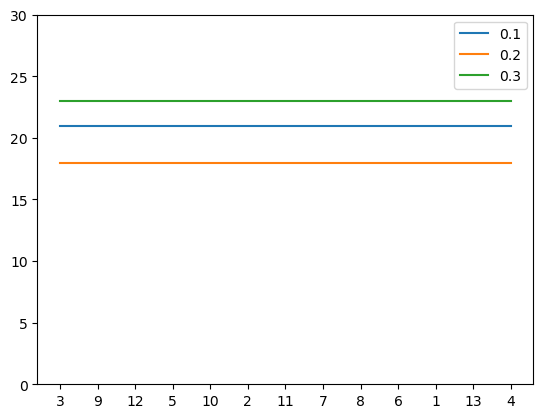

In [50]:
for i,count in plot_label_count[:-2]:
    print(np.array(list(count.values())))
    plt.plot(list(count.keys()), np.array(list(count.values()))[:,0],label=i)
#     plt.scatter(list(count.keys()), list(count.values()),label=i)
plt.legend()
plt.ylim(0,30)

In [343]:

img_dict

False classification:  {'5': 5, '6': 2, '2': 3, '13': 3, '3': 3, '11': 2, '10': 1, '8': 1}


{'5': [948, 985, 994, 993, 700],
 '6': [948, 985],
 '2': [948, 985, 637],
 '13': [985, 994, 993],
 '3': [994, 993, 700],
 '11': [994, 993],
 '10': [994],
 '8': [993]}

2 0.6
3 0.6
5 1.0
6 0.4
8 0.2
10 0.2
11 0.4
13 0.6


(0.0, 5.0)

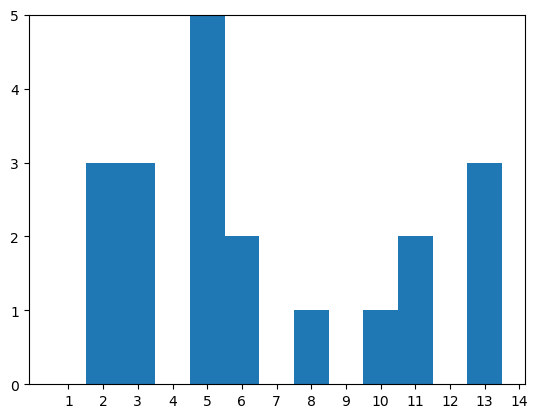

In [334]:
plt.hist(false_ls,bins=np.arange(0.5,14.5,1))
plt.xticks(np.arange(1,15))
plt.ylim(0,5)

In [95]:
with open(f'splits/PA/split_16.pyb', "rb") as f:
    _,_,train_seg_path,test_seg_path,_,_ = pickle.load(f)

In [98]:
count_dict = {}
for img in train_seg_path:
    i = os.path.basename(os.path.normpath(img))
    i = int(i[:-4])
    if i not in image_label_pair.keys():
        continue
    for l in image_label_pair[i]:
        if l in count_dict.keys():
            count_dict[l]+=1
        else:
            count_dict[l] = 1
print('train segmenation count: ',count_dict)   

train segmenation count:  {'4': 4, '13': 6, '9': 3, '12': 6, '3': 11, '10': 1, '8': 2, '5': 1, '7': 1, '11': 2, '6': 1, '2': 1}


In [99]:
count_dict = {}
for img in test_seg_path:
    i = os.path.basename(os.path.normpath(img))
    i = int(i[:-4])
    if i not in image_label_pair.keys():
        continue
    for l in image_label_pair[i]:
        if l in count_dict.keys():
            count_dict[l]+=1
        else:
            count_dict[l] = 1
print('test segmenation count: ',count_dict)  

test segmenation count:  {'11': 9, '13': 12, '3': 64, '12': 13, '8': 10, '7': 16, '10': 15, '4': 14, '9': 15, '6': 13, '1': 11, '5': 6, '2': 8}


In [ ]:
result_parent_path =  "E:/AI/FAPS/code/Mixedsupervision/results/KSDD2"
test_paths = ['N_246','N_126','N_53','N_16','N_0']
for testname in test_paths:
    resultcsv_path = os.path.join(result_parent_path,testname,'results.csv').replace("\\",'/')
    df_result = pd.read_csv(resultcsv_path)
    df_result.loc[:,'ground_truth'] =  df_result.loc[:,'ground_truth'] == 1
    
    print(testname,f1_score(df_result.ground_truth,df_result.decision),precision_score(df_result.ground_truth,df_result.decision),recall_score(df_result.ground_truth,df_result.decision))
    wrong_df = df_result.loc[df_result['decision'] != df_result['ground_truth'],:]

In [ ]:
result_parent_path =  "E:/AI/FAPS/code/Mixedsupervision/results/PA"
test_paths = ['WS288','WS126','WS53','WS16 - Copy','WS0 - Copy']
for testname in test_paths:
    resultcsv_path = os.path.join(result_parent_path,testname,'results.csv').replace("\\",'/')
    df_result = pd.read_csv(resultcsv_path)
    df_result.loc[:,'ground_truth'] =  df_result.loc[:,'ground_truth'] == 1
    
    print(testname,f1_score(df_result.ground_truth,df_result.decision),precision_score(df_result.ground_truth,df_result.decision),recall_score(df_result.ground_truth,df_result.decision))
    wrong_df = df_result.loc[df_result['decision'] != df_result['ground_truth'],:]